In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import datetime
import matplotlib.pyplot as plt
# from dateutil.relativedelta import relativedelta

In [2]:
def prophet(data: pd.DataFrame) -> list:
    """
    get prediction by using fbprophet
    :param data:  Dataframe - data with two columns date and y
    :return:      Dateframe - predict result
    """
    subset = pd.DataFrame({
        'ds': data.date,
        'y': data.y,
    })

    m = Prophet(
        daily_seasonality=True,
#         weekly_seasonality=True,
        yearly_seasonality=False,
        growth='linear',
    )
    m.fit(subset)

    future = m.make_future_dataframe(periods=24, freq='H')

    forecast = m.predict(future)
    
    fig1 = m.plot(forecast)
    
    return forecast

In [3]:
data = pd.read_excel('data3.xlsx')
data.columns = ['date', 'y']
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H')
data.y,plot()

,date,y
0,2020-10-01 00:00:00,670718
1,2020-10-01 01:00:00,648975
2,2020-10-01 02:00:00,635599
3,2020-10-01 03:00:00,536269
4,2020-10-01 04:00:00,356870


/usr/local/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.

/usr/local/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.

/usr/local/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.

/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning:

Support for 

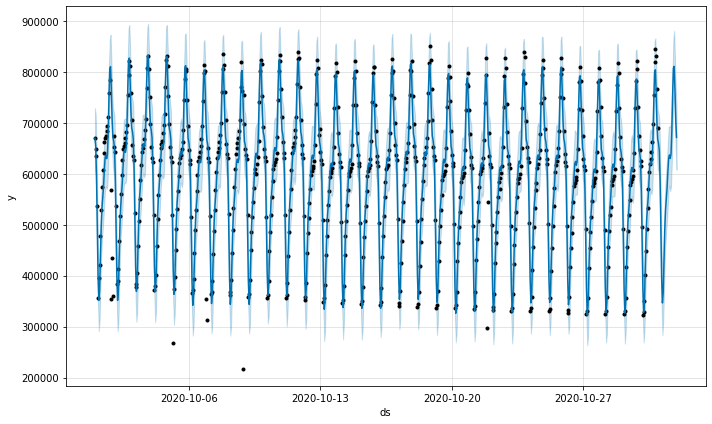

In [11]:
data = data[data.date < '20201031']
result = prophet(data)

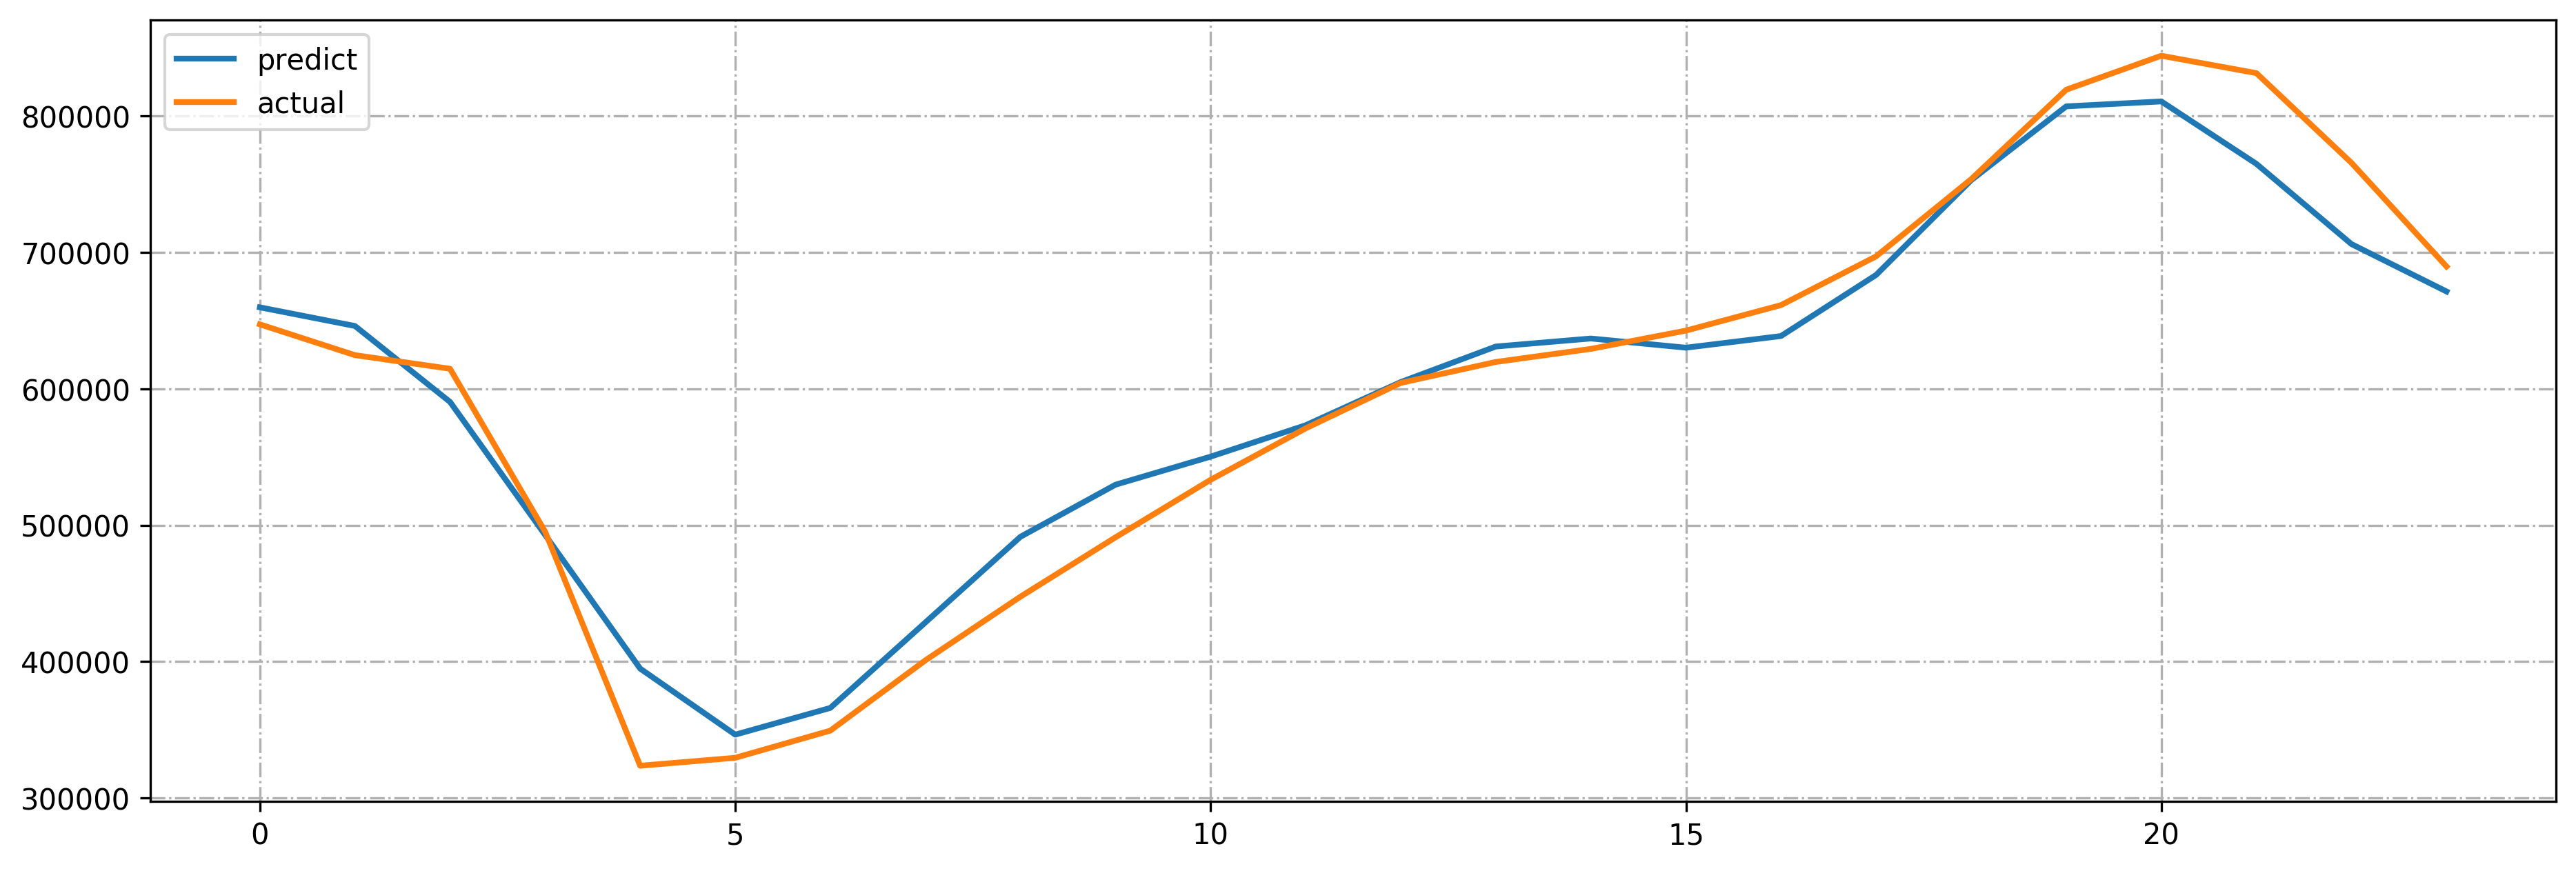

In [12]:
predict = result.tail(24).yhat.values
actual = data.tail(24).y.values
x = [x for x in range(24)]
fig, ax = plt.subplots(figsize=(15,5),dpi = 300)
ax.plot(x, predict, linewidth=2.0,label = "predict")
ax.plot(x, actual, linewidth=2.0,label = "actual")
ax.legend(loc=2);
# ax.set_title(bf_name)
#     plt.ylim((0, 450000))
plt.grid(linestyle='-.')
plt.show()

In [13]:
error = 0
summery = 0
for i in range(24):
    error += abs(predict[i] - actual[i])
    summery += actual[i]
acc = 1 - error/summery
acc

0.9614766675061719